# Đồ án cuối kỳ

## 1. Thu thập dữ liệu

Tập [dữ liệu](https://www.kaggle.com/benroshan/factors-affecting-campus-placement) này bao gồm dữ liệu về vị trí của sinh viên trong khuôn viên trường. Nó bao gồm tỷ lệ phần trăm trung học cơ sở trở lên và chuyên môn hóa. Nó cũng bao gồm chuyên môn hóa bằng cấp, loại hình và kinh nghiệm làm việc cũng như đề nghị trả lương cho các sinh viên được sắp xếp.

### Các thư viện cần thiết

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [60]:
# from google.colab import drive
# drive.mount('/content/drive')
# folder_path = '/content/drive/MyDrive/Final_Project//'

### Đọc dữ liệu

In [61]:
# df = pd.read_csv(folder_path + 'Placement_Data_Full_Class.csv')
df = pd.read_csv('Placement_Data_Full_Class.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


## 2. Khám phá dữ liệu

### Ý nghĩa của các cột

- **sl_no**: Mã phân biệt mỗi học sinh.
- **gender**: Giới tính (M - con trai và F - con gái).
- **ssc_p**: Điểm lớp 10.
- **ssc_b**: Hội đồng giáo dục trường cấp 2.
- **hsc_p**: Điểm lớp 12.
- **hsc_b**: Hội đồng giáo dục trường cấp 3.
- **hsc_s**: Chuyên ngành trường cấp 3.
- **degree_p**: Điểm bằng đại học.
- **degree_t**: Lĩnh vực học.
- **workex**: Kinh nghiệm làm việc.
- **etest_p**: Điểm bài kiểm tra nhân sự.
- **specialisation**: Chuyên ngành sau đại học (MBA).
- **mba_p**: Điểm MBA (Master of Business Administration) [See more](https://www.mba.com/explore-programs/choose-and-compare-programs/what-is-an-mba). 
- **status**: Tình trạng công việc.
- **salary**: Tiền lương.

### Kích thước dữ liệu

In [62]:
num_rows = df.shape[0]
print("Số dòng: ",num_rows)
num_cols = df.shape[1]
print("Số cột: ",num_cols)

Số dòng:  215
Số cột:  15


### Các giá trị trùng trong dữ liệu

In [63]:
have_duplicated_rows = df.duplicated().sum()
have_duplicated_rows

0

### Các giá trị rỗng

In [64]:
df.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

Kiểm tra có dòng nào không thoả điều kiện nếu học sinh không có việc làm thì sẽ không có lương hay không?

In [65]:
df[(df.status == "Not Placed") & (df.salary.notna())].shape[0]

0

- Theo kết quả ở trên, bộ dữ liệu có tới 67/215 giá trị ở cột salary là giá trị rỗng.
- Không thể xoá các dòng chứa giá trị rỗng này đi, vì làm vậy sẽ làm giảm tới hơn 30% số lượng dữ liệu.

=> Các giá trị rỗng này sẽ được điền thành giá trị '0' hoặc median của cột salary nhằm tạo sự bình đẳng.

In [66]:
df['salary'].fillna(value = 0, inplace = True)

### Đặc trưng của dữ liệu

#### Kiểu dữ liệu

In [67]:
value = df.dtypes
key = df.columns.values
col_dtypes = dict(zip(key,value))
col_dtypes

{'sl_no': dtype('int64'),
 'gender': dtype('O'),
 'ssc_p': dtype('float64'),
 'ssc_b': dtype('O'),
 'hsc_p': dtype('float64'),
 'hsc_b': dtype('O'),
 'hsc_s': dtype('O'),
 'degree_p': dtype('float64'),
 'degree_t': dtype('O'),
 'workex': dtype('O'),
 'etest_p': dtype('float64'),
 'specialisation': dtype('O'),
 'mba_p': dtype('float64'),
 'status': dtype('O'),
 'salary': dtype('float64')}

#### Kiểu dữ liệu số

In [68]:
numerical_df = df.select_dtypes(exclude='object')
numerical_df =numerical_df.drop(columns=['sl_no'])
numerical_df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,198702.325581
std,10.827205,10.897509,7.358743,13.275956,5.833385,154780.926716
min,40.890000,37.000000,50.000000,50.000000,51.210000,0.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,0.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,240000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,282500.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


***Nhận Xét***
- Nhìn vô bảng trên, có thể thấy các giá trị ở các cột ngoài cột 'salary' đều bình thường, không có gì bất ổn.
- Lý do dẫn tới việc kết luận cột salary có dữ liệu hơi bất thường là độ lệch chuẩn có giá trị lớn và giá trị max có độ lệch rất xa so với giá trị khác.

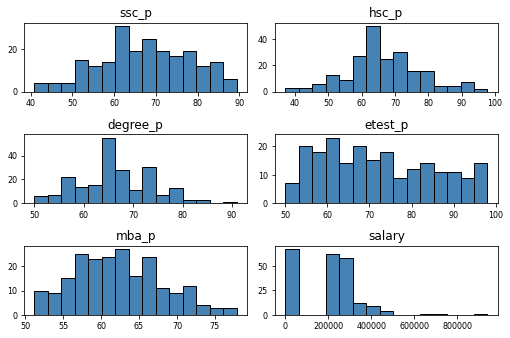

In [69]:
numerical_df.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))  

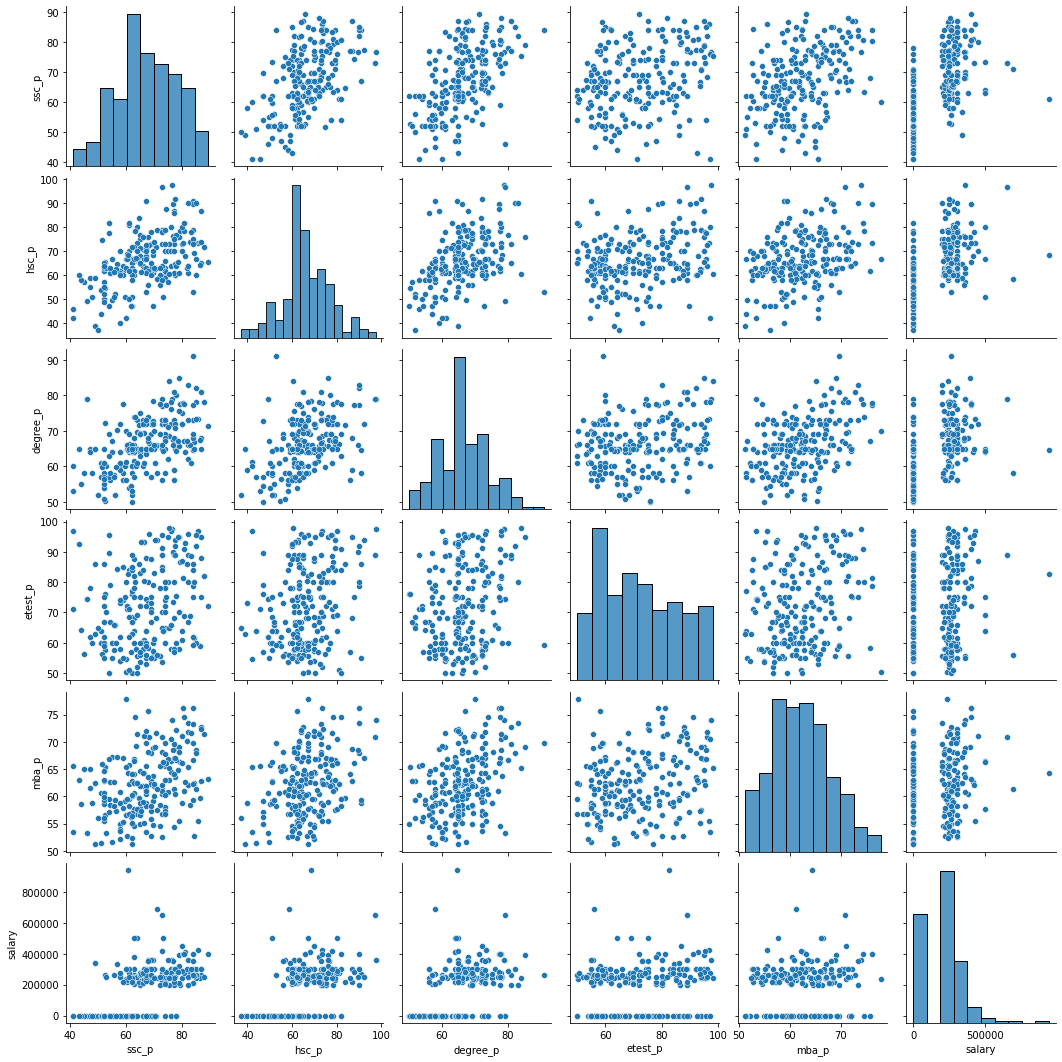

In [70]:
sns.pairplot(data=numerical_df,palette="Blues_d")

Độ tương quan giữa các thuộc tính số trong dữ liệu

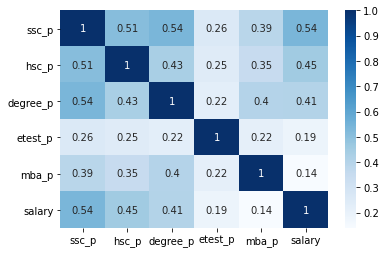

In [71]:
sns.heatmap(numerical_df.corr(), annot = True, cmap="Blues")

**NHẬN XÉT:**

Từ biểu diễn bên trên ta có thể suy ra các thuộc tính số trong dữ liệu không có tương quan dương với nhau nên không cần loại bỏ bất kỳ dòng dữ liệu nào.

#### Kiểu dữ liệu object

In [72]:
categorical_df = df.select_dtypes(include='object')
categorical_df.dtypes

gender            object
ssc_b             object
hsc_b             object
hsc_s             object
degree_t          object
workex            object
specialisation    object
status            object
dtype: object

Giới tính

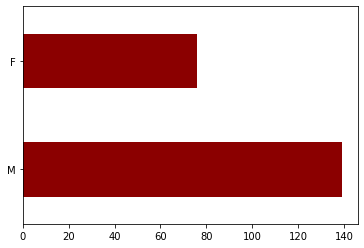

In [73]:
categorical_df['gender'].value_counts().plot.barh(color='darkred')

Hội đồng giáo dục trường cấp 2

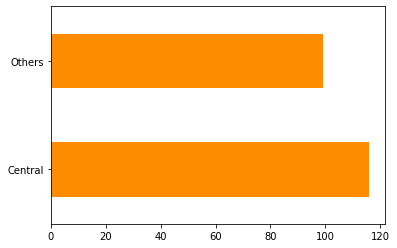

In [74]:
categorical_df['ssc_b'].value_counts().plot.barh(color='darkorange')

Hội đồng giáo dục trường cấp 3

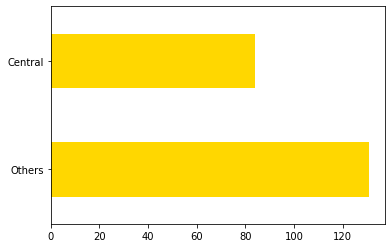

In [75]:
categorical_df['hsc_b'].value_counts().plot.barh(color='gold')

Chuyên ngành cấp 3

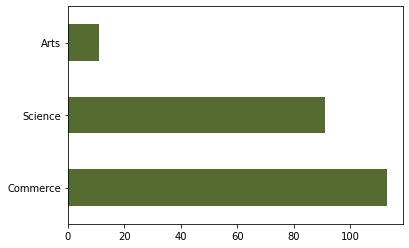

In [76]:
categorical_df['hsc_s'].value_counts().plot.barh(color='darkolivegreen')

Lĩnh vực học

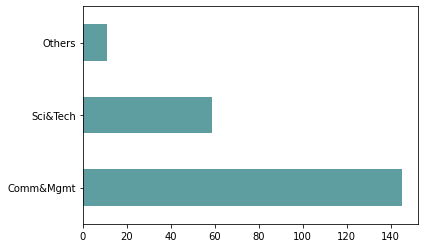

In [77]:
categorical_df['degree_t'].value_counts().plot.barh(color='cadetblue')

Kinh nghiệm làm việc

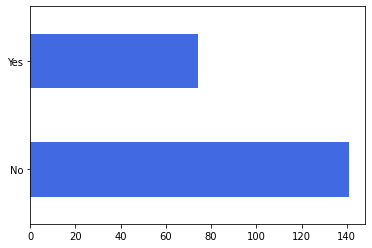

In [78]:
categorical_df['workex'].value_counts().plot.barh(color='royalblue')

Chuyên ngành sau đại học (MBA)

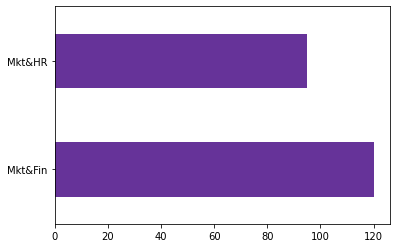

In [79]:
categorical_df['specialisation'].value_counts().plot.barh(color='rebeccapurple')

Tình trạng công việc

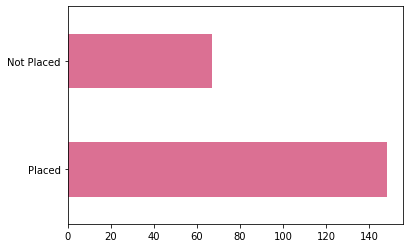

In [80]:
categorical_df['status'].value_counts().plot.barh(color='palevioletred')

## 3. Đặt câu hỏi

### 3.1 Mẫu phổ biến của các học sinh có việc làm ?
Mẫu phổ biến còn có thể hiểu là các đặc trưng phổ biến trong nhóm các học sinh có việc làm trong trường đại học A. Việc tìm ra được các đặc trưng này sẽ giúp cho học sinh có cơ sở và định hướng rõ ràng trong việc lựa chọn các chuyên ngành trong tương lai và biết được cần cố gắng ở những khía cạnh nào để đạt được kết quả như mong đợi.

### 3.2 Liệu rằng giới tính của sinh viên có ảnh hưởng tới lương và tình trạng có việc làm ?

### 3.3 Nhân tố nào ảnh hưởng nhất tới mức lương của sinh viên ?

## 4. Tiền xử lý dữ liệu

Nếu để ý kĩ thì tất cả các cột dữ liệu số trong tập dữ liệu đều là điểm số của học sinh lần lượt ở năm lớp 10, lớp 12, đại học và sau đại học. Có thể thấy việc phân tích các giá trị liên tục trong trường hợp này khá phức tạp và mang lại ít giá trị hữu ích cộng thêm việc các giá trị điểm này đã được rời rạc hoá dưới dạng phân loại:
 * A	90%-100%
 * B	80%–89%
 * C	70%–79%
 * D	60%–69%
 * F	0%-59%

In [81]:
def s(x):
  if x >= 90.0:
    return 'A'
  elif x >= 80.0:
    return 'B'
  elif x >= 70.0:
    return 'C'
  elif x >= 60.0:
    return 'D'
  else:
    return 'F'
col = numerical_df.drop(columns=['salary']).columns
new_df = df.copy()
for i in col:
    new_df[i] = new_df[i].apply(s)
new_df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,D,Others,A,Others,Commerce,F,Sci&Tech,No,F,Mkt&HR,F,Placed,270000.0
1,2,M,C,Central,C,Others,Science,C,Sci&Tech,Yes,B,Mkt&Fin,D,Placed,200000.0
2,3,M,D,Central,D,Central,Arts,D,Comm&Mgmt,No,C,Mkt&Fin,F,Placed,250000.0
3,4,M,F,Central,F,Central,Science,F,Sci&Tech,No,D,Mkt&HR,F,Not Placed,0.0
4,5,M,B,Central,C,Central,Commerce,C,Comm&Mgmt,No,A,Mkt&Fin,F,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,B,Others,B,Others,Commerce,C,Comm&Mgmt,No,A,Mkt&Fin,C,Placed,400000.0
211,212,M,F,Others,D,Others,Science,C,Sci&Tech,No,C,Mkt&Fin,F,Placed,275000.0
212,213,M,D,Others,D,Others,Commerce,C,Comm&Mgmt,Yes,F,Mkt&Fin,D,Placed,295000.0
213,214,F,C,Others,D,Others,Commerce,F,Comm&Mgmt,No,C,Mkt&HR,D,Placed,204000.0


### Các dữ liệu phân loại mới có gì ?

Điểm lớp 10

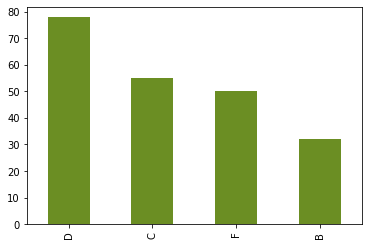

In [82]:
new_df['ssc_p'].value_counts().plot.bar(color='olivedrab')

Điểm 12

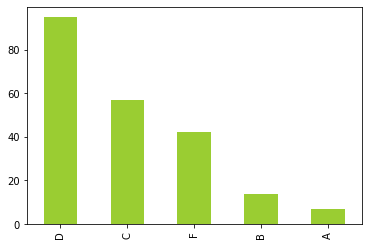

In [84]:
new_df['hsc_p'].value_counts().plot.bar(color='yellowgreen')

Điểm đại học

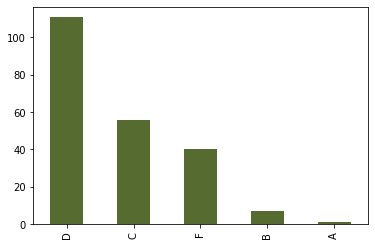

In [85]:
new_df['degree_p'].value_counts().plot.bar(color='darkolivegreen')

Điểm bài kiểm tra nhân sự

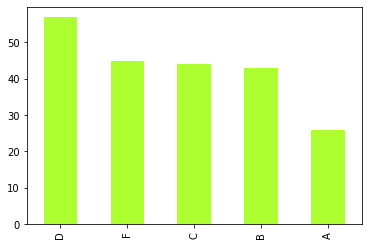

In [86]:
new_df['etest_p'].value_counts().plot.bar(color='greenyellow')

Điểm sau đại học

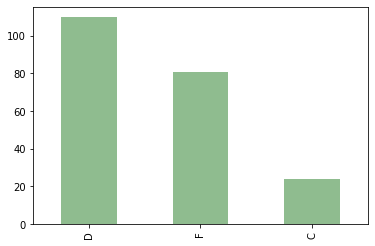

In [87]:
new_df['mba_p'].value_counts().plot.bar(color='darkseagreen')

## 6. Trả lời câu hỏi

### Mẫu phổ biến của các học sinh có việc làm ?

In [88]:
frequency_item_df = new_df[new_df['status'] == 'Placed'].drop(columns = ['sl_no', 'gender', 'ssc_b', 'hsc_b', 'status','salary'])
frequency_item_df = frequency_item_df.value_counts().reset_index(name = 'count')

In [89]:
frequency_item_df = frequency_item_df[frequency_item_df['count'] >= frequency_item_df['count'].max()]
frequency_item_df

,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,count
0,C,D,Science,D,Sci&Tech,Yes,A,Mkt&Fin,D,2
1,D,D,Commerce,D,Comm&Mgmt,No,D,Mkt&Fin,F,2
2,B,C,Commerce,D,Comm&Mgmt,No,D,Mkt&Fin,D,2
3,C,C,Commerce,C,Comm&Mgmt,No,A,Mkt&Fin,D,2
4,D,D,Commerce,C,Comm&Mgmt,No,F,Mkt&HR,D,2


### Liệu rằng giới tính của sinh viên có ảnh hưởng tới lương và tình trạng có việc làm ?

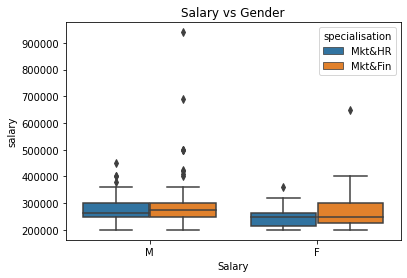

In [90]:
# Biểu đồ "Box and whiskers" rất hữu ích để tìm mối quan hệ giữa biến số và biến phân loại.
placed_df = new_df[new_df['status'] == 'Placed']
sns.boxplot(x=placed_df['gender'], y = placed_df['salary'], hue='specialisation', data=placed_df)
plt.title("Salary vs Gender")
plt.xlabel("Gender")
plt.xlabel("Salary")
plt.show()

***Nhận Xét***

Theo biểu đồ ở trên, những điểm nhiễu hoặc giá trị cực đoan trong cột salary nằm ở nam nhiều hơn nữ. Một trong những giả thuyết hợp lý là một số ứng viên nam được tuyển dụng vào vị trí cao hơn trong một công ty, đó là lý do tại sao họ nhận được nhiều lương hơn.

### Nhân tố nào ảnh hưởng nhất tới việc làm của sinh viên ?

In [91]:
temp_df = new_df.drop(columns = ['sl_no', 'salary'])
temp_df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,D,Others,A,Others,Commerce,F,Sci&Tech,No,F,Mkt&HR,F,Placed
1,M,C,Central,C,Others,Science,C,Sci&Tech,Yes,B,Mkt&Fin,D,Placed
2,M,D,Central,D,Central,Arts,D,Comm&Mgmt,No,C,Mkt&Fin,F,Placed
3,M,F,Central,F,Central,Science,F,Sci&Tech,No,D,Mkt&HR,F,Not Placed
4,M,B,Central,C,Central,Commerce,C,Comm&Mgmt,No,A,Mkt&Fin,F,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,B,Others,B,Others,Commerce,C,Comm&Mgmt,No,A,Mkt&Fin,C,Placed
211,M,F,Others,D,Others,Science,C,Sci&Tech,No,C,Mkt&Fin,F,Placed
212,M,D,Others,D,Others,Commerce,C,Comm&Mgmt,Yes,F,Mkt&Fin,D,Placed
213,F,C,Others,D,Others,Commerce,F,Comm&Mgmt,No,C,Mkt&HR,D,Placed


### Điểm số có ảnh hưởng đến việc làm của sinh viên hay không?

In [92]:
def count_value(s):
    return s.value_counts()
tmp_df = new_df[new_df.status=="Placed"][col]
score_student = tmp_df.apply(count_value)
score_student.fillna(value = 0, inplace = True)
score_student

,ssc_p,hsc_p,degree_p,etest_p,mba_p
A,0.0,7,1,22,0.0
B,32.0,13,7,34,0.0
C,50.0,49,50,28,19.0
D,56.0,69,78,33,76.0
F,10.0,10,12,31,53.0


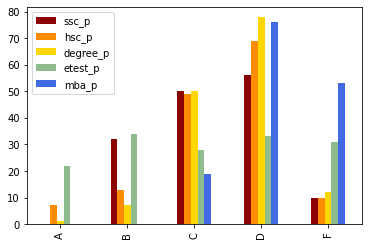

In [93]:
score_student.plot.bar(color=['darkred','darkorange','gold','darkseagreen','royalblue'])

***Nhận Xét***

Theo nhé kết quả phân tích bên trên, ta có thể thấy đa phần học sinh có điểm D ở tất cả các khối lớp và hầu như rất ít khi đạt điểm A. Đồng thời số lượng học sinh đạt điểm F lại cáo hơn rất nhiều so với điểm A. Chính vì vậy mà ta có thể rút ra nhận xét là điểm số không quyết định đến việc học sinh có được nhận công việc hay không.

### Điểm số có ảnh hưởng tới tiền lương của học sinh hay không?

In [97]:
score_aff_salary = df[df.status=="Placed"][numerical_df.columns]
score_aff_salary 

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
0,67.00,91.00,58.00,55.0,58.80,270000.0
1,79.33,78.33,77.48,86.5,66.28,200000.0
2,65.00,68.00,64.00,75.0,57.80,250000.0
4,85.80,73.60,73.30,96.8,55.50,425000.0
7,82.00,64.00,66.00,67.0,62.14,252000.0
...,...,...,...,...,...,...
209,62.00,72.00,65.00,67.0,56.49,216000.0
210,80.60,82.00,77.60,91.0,74.49,400000.0
211,58.00,60.00,72.00,74.0,53.62,275000.0
212,67.00,67.00,73.00,59.0,69.72,295000.0


#### Xét các thuộc tính điểm riêng lẻ

Biểu diễn tương quan giữa các loại điểm và tiền lương

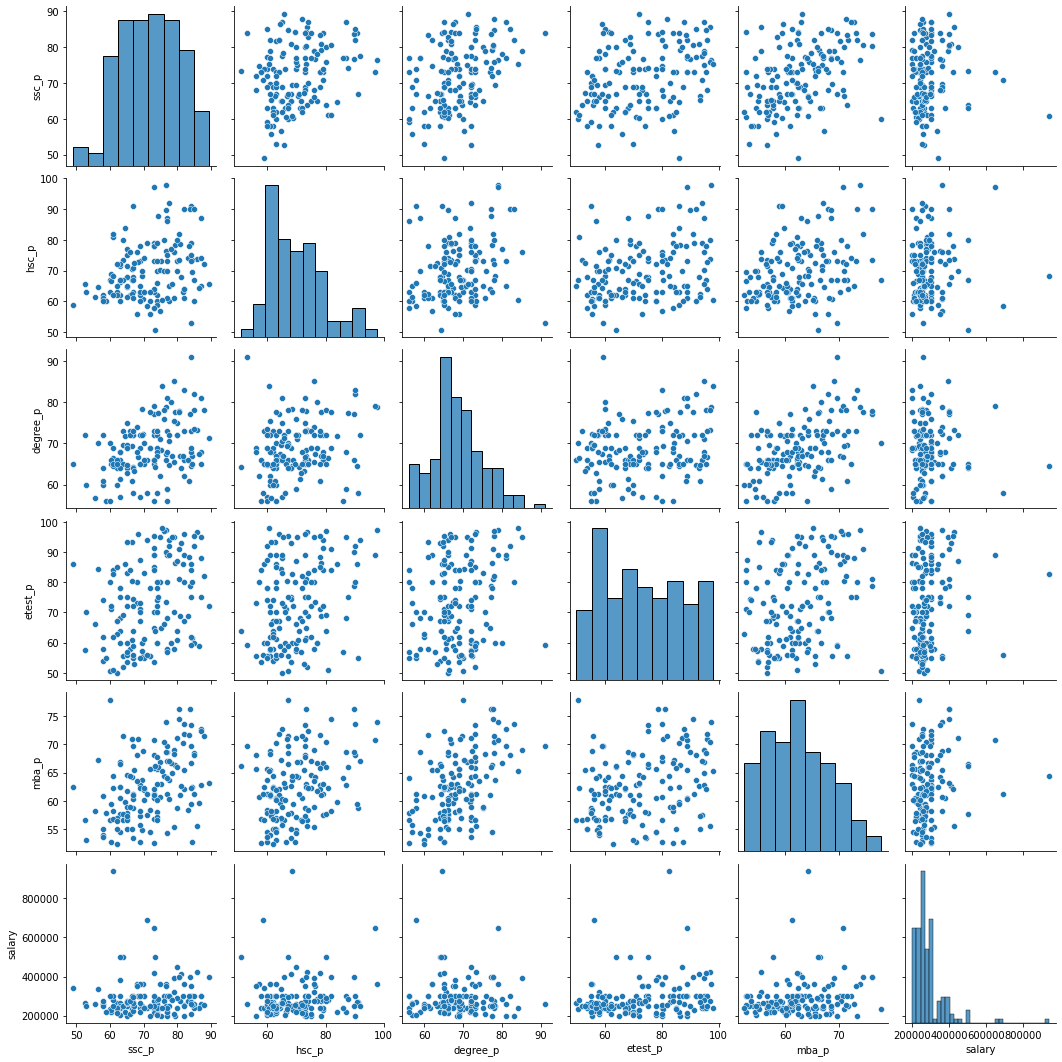

In [100]:
sns.pairplot(data=score_aff_salary,palette="Blues_d")

Độ tương quan giữa các điểm so với tiền lương

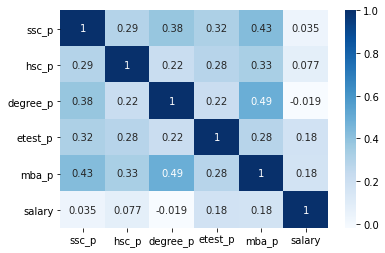

In [99]:
sns.heatmap(score_aff_salary.corr(), annot = True, cmap="Blues")

***Nhận Xét***

Nếu chỉ xét riêng lẻ từng thuộc tính điểm trong dữ liệu thì ta thấy được tiền lương của học sinh khi ra trường không hề có quan hệ dương đối với bất kỳ một cột điểm riêng lẻ nào hay nói đúng hơn nếu một cột điểm của sinh viên có cao đi chăng nữa cũng không ảnh hưởng đến tiền lương khi ra trường.

#### Xét các thuộc tính điểm theo từng cặp

### Chuyên ngành được các doanh nghiệp yêu cầu cao ?

Chuyên ngành lớp cấp 3

In [94]:
hsc_s = new_df[new_df.status=="Placed"]['hsc_s'].value_counts()
hsc_s

Commerce    79
Science     63
Arts         6
Name: hsc_s, dtype: int64

Chuyên ngành đại học

In [95]:
spec_col = ['hsc_s','degree_t','specialisation']
degree_t = new_df[new_df.status=="Placed"]['degree_t'].value_counts()
degree_t

Comm&Mgmt    102
Sci&Tech      41
Others         5
Name: degree_t, dtype: int64

Chuyên ngành sau đại học

In [96]:
specialisation = new_df[new_df.status=="Placed"]['specialisation'].value_counts()
specialisation

Mkt&Fin    95
Mkt&HR     53
Name: specialisation, dtype: int64

## 5. Reflection